In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
path = '/content/drive/MyDrive/'
import numpy as np

Only WordCounter part was used in my thesis at the end. 

In [ ]:
##loading the raw ISOT dataset. This can be downloaded at the link in the Appendix.

train_data = pd.read_csv(path + 'Fake1.csv', encoding="UTF-8",low_memory=False)
train_data['labels']=1    #Fake news is labeled as "1"

train_data2 = pd.read_csv(path + 'True1.csv', encoding="UTF-8",low_memory=False)
train_data2['labels']=0    #Real news is labeled as "0"
train_data=pd.concat([train_data, train_data2], ignore_index=True)


train_data = train_data.loc[:, ~train_data.columns.str.contains('^Unnamed')]
train_data=train_data.convert_dtypes()
train_data[["date"]] = train_data[["date"]] .apply(lambda x:pd.to_datetime(x,errors='coerce',format="%Y-%m-%d"))


In [ ]:
train_data

,title,text,subject,date,labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1
...,...,...,...,...,...
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,0
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,0
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,0
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,0


In [ ]:
len(train_data[train_data['labels']==0])  #Number of Real News

21417

In [ ]:
len(train_data[train_data['labels']==1]) #Number of Fake News

23502

1. Wordcloud

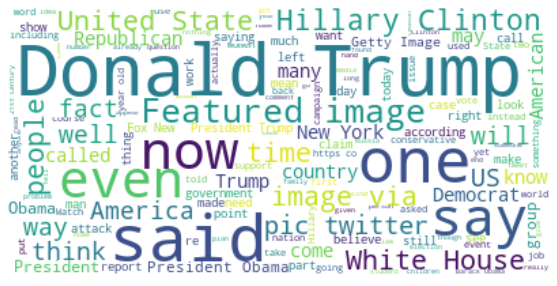

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text1 = " ".join(review for review in train_data[train_data['labels']==1].text)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(text1)


plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig(f'fakenews_wordcloud.png', bbox_inches='tight', #saving the image for latex
            dpi = 300, pad_inches=0)

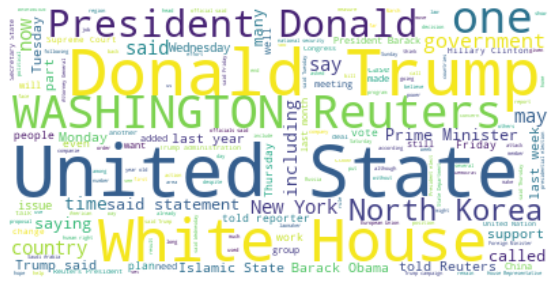

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text1 = " ".join(review for review in train_data[train_data['labels']==0].text)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(text1)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig(f'realnews_wordcloud.png', bbox_inches='tight',  #saving the image for latex
            dpi = 300, pad_inches=0)

2. Label balance

([<matplotlib.patches.Wedge at 0x7f74ce7a6bd0>,
 [Text(-1.097077450298304, 0.08013156710667957, 'Real'),
  Text(1.097077450298304, -0.0801315671066802, 'Fake')],
 [Text(-0.5984058819808931, 0.043708127512734306, '47.7%'),
  Text(0.5984058819808931, -0.043708127512734646, '52.3%')])

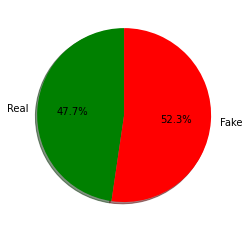

In [ ]:
colors = ['green','red']
name = ['Real','Fake']
label = [len(train_data[train_data['labels']==0]),len(train_data[train_data['labels']==1])]
plt.pie(label, labels=name, autopct='%0.1f%%', shadow=True, startangle=90,colors=colors)

3. Word Counter

In [ ]:
train_data['word_count'] = train_data['text'].apply(lambda x: len(str(x).split()))
train_data['review_len'] = train_data['text'].astype(str).apply(len)

In [ ]:
train_data

,title,text,subject,date,labels,word_count,review_len
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,495,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,305,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,580,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,444,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,420,2346
...,...,...,...,...,...,...,...
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,0,466,2821
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,0,125,800
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,0,320,1950
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,0,205,1199


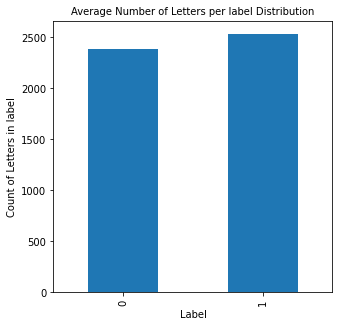

In [ ]:
letter_avg = train_data.groupby('labels')['review_len'].mean().plot(kind='bar', figsize=(5,5))
plt.xlabel('Label', fontsize=10)
plt.ylabel('Count of Letters in label', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Number of Letters per label Distribution', fontsize=10)
plt.show()

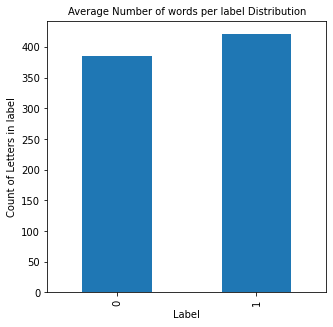

In [ ]:
letter_avg = train_data.groupby('labels')['word_count'].mean().plot(kind='bar', figsize=(5,5))
plt.xlabel('Label', fontsize=10)
plt.ylabel('Count of Letters in label', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Average Number of words per label Distribution', fontsize=10)
plt.show()

4. Readability

In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 4.4 MB/s 
     |████████████████████████████████| 2.0 MB 28.9 MB/s 


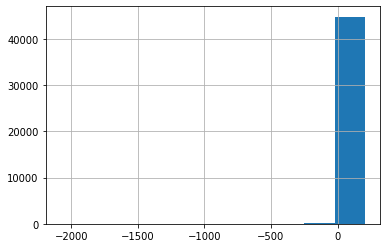

In [ ]:
#Readability of Real News

from textstat import flesch_reading_ease
train_data['text'].\
   apply(lambda x : flesch_reading_ease(x)).hist()

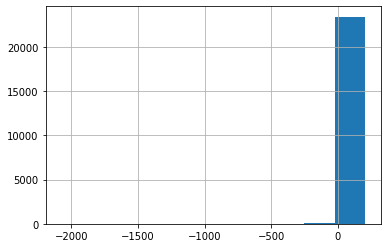

In [ ]:
#Readability of Fake News

train_data[train_data['labels']==1]['text'].\
   apply(lambda x : flesch_reading_ease(x)).hist()